    Расчёт снеговой нагрузки по СП 20.13330.2016

In [1]:
import numpy as np
import pandas as pd
import math
import unicodedata as ucd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from tabulate import tabulate
from IPython.display import display
from ipywidgets import Dropdown

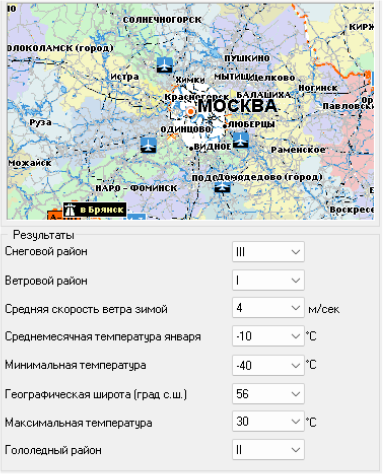

In [2]:
htop = 59.4 # высота высокого здания
dtop = 16 # "размер высокого здания в направлении, перпендикулярном расчетному направлению ветра"
ztop = 59.55 # высота от поверхности земли
hbot = 54.6 # высота низкого здания
dbot = 18 # "размер низкого здания в направлении, перпендикулярном расчетному направлению ветра"
zbot = 54.75 # высота от поверхности земли
btop = 16 # наименьший размер верхнего покрытия в плане
ltop = 21.4 # наибольший размер верхнего покрытия в плане
bbot = 18 # наименьший размер нижнего покрытия в плане
lbot = 21.6 # наибольший размер нижнего покрытия в плане
slopetop = 0 # уклон верхнего покрытия
slopebot = 0 # уклон нижнего покрытия
hptop = 0.4 # высота парапета верхнего покрытия
hpbot = 0.9 # высота парапета нижнего покрытия
tjan = -10 # среднемесячная температура воздуха в январе
atop = 0 # уклон двускатного верхнего покрытия
abot = 0 # уклон двускатного нижнего покрытия
ct = 1 # термический коэффициент
gf = 1.4 # Коэффициент надежности по нагрузке

In [3]:
t_protect = Dropdown(
    options = ["yes", "no"],
    value ='no', # Выбор по умолчанию
    description = 'защита от ветра:' 
)
display(t_protect)
protect = t_protect.label # покрытия зданий, защищенных от прямого воздействия ветра

Dropdown(description='защита от ветра:', index=1, options=('yes', 'no'), value='no')

In [4]:
regions=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']
table10_1 = pd.Series([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4], index=regions)
print('            Таблица 10.1')
print(tabulate (pd.DataFrame(table10_1).transpose(), showindex=False, headers=regions))

            Таблица 10.1
  I    II    III    IV    V    VI    VII    VIII
---  ----  -----  ----  ---  ----  -----  ------
0.5     1    1.5     2  2.5     3    3.5       4


In [5]:
s_region = Dropdown(
    options=regions,
    value = 'III', # Выбор по умолчанию
    description = 'Снеговой район:' 
)
display(s_region)
snow_region = s_region.label

Dropdown(description='Снеговой район:', index=2, options=('I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'), v…

In [6]:
Sg = table10_1[snow_region]
print('нормативное значение веса снегового покрова Sg = {0} кПа'.format(Sg))

нормативное значение веса снегового покрова Sg = 1.5 кПа


In [7]:
columns=['Ze', 'A', 'B', 'C']
table11_2 = pd.DataFrame(np.array([[5, 0.75, 0.5, 0.4],
                                  [10, 1, 0.65, 0.4],
                                  [20, 1.25, 0.85, 0.55],
                                  [40, 1.5, 1.1, 0.8],
                                  [60, 1.7, 1.3, 1],
                                  [80, 1.85, 1.45, 1.15],
                                  [100, 2, 1.6, 1.25],
                                  [150, 2.25, 1.9, 1.55],
                                  [200, 2.45, 2.1, 1.8],
                                  [250, 2.65, 2.3, 2],
                                  [300, 2.75, 2.5, 2.2]]),
                                  columns=columns)
table11_2 = table11_2.set_index(['Ze'])
print('    Таблица 11.2')
print(tabulate(table11_2, headers=columns, showindex="always"))

    Таблица 11.2
  Ze     A     B     C
----  ----  ----  ----
   5  0.75  0.5   0.4
  10  1     0.65  0.4
  20  1.25  0.85  0.55
  40  1.5   1.1   0.8
  60  1.7   1.3   1
  80  1.85  1.45  1.15
 100  2     1.6   1.25
 150  2.25  1.9   1.55
 200  2.45  2.1   1.8
 250  2.65  2.3   2
 300  2.75  2.5   2.2


                 типы местности:

A - открытые побережья морей, озер и водохранилищ, сельские местности, в том числе с постройками высотой менее 10 м, пустыни, степи, лесостепи, тундра;

B - городские территории, лесные массивы и другие местности, равномерно покрытые препятствиями высотой более 10 м;

C - городские районы с плотной застройкой зданиями высотой более 25 м.


In [8]:
t_terrain = Dropdown(
    options = columns[1:],
    value = 'B', # Выбор по умолчанию
    description = 'тип местности:' 
)
display(t_terrain)
terrain = t_terrain.label

Dropdown(description='тип местности:', index=1, options=('A', 'B', 'C'), value='B')

In [9]:
def zei(z, d, h):
    if construction == "building":
        if h <= z:
            ze = h
        elif d < h <= 2 * d:
            if z >= h - d:
                ze = h
            elif 0 < z < h - d:
                ze = d
            else:
               ze = z
        elif h > 2 * d:
            if z >= h - d:
                ze = h
            elif d < z < h - d:
                ze = z
            elif 0 <= z <= d:
                ze = d
            else:
              ze = z
        else:
            ze = z
    return ze

In [10]:
t_building = Dropdown(
    options=["building", "tower"],
    value='building', # Выбор по умолчанию
    description='тип сооружения:' 
)
display(t_building)
construction=t_building.label

Dropdown(description='тип сооружения:', options=('building', 'tower'), value='building')

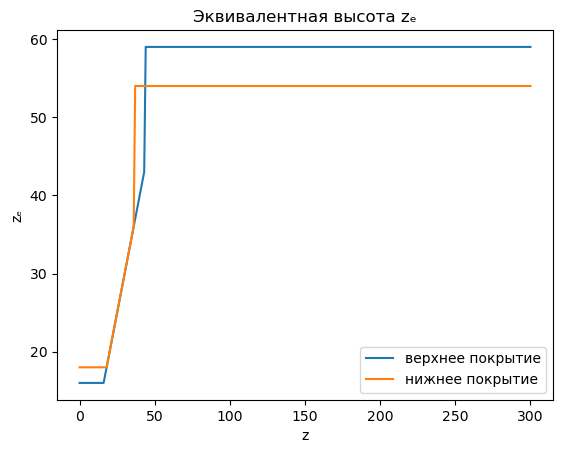

In [11]:
z = np.arange(0, 301)
vzei = np.vectorize(zei)
zetop = vzei(z, dtop, htop)
zebot = vzei(z, dbot, hbot)
plt.plot(z, zetop, label='верхнее покрытие')
plt.plot(z, zebot, label='нижнее покрытие')
plt.legend()
plt.xlabel('z')
plt.ylabel('z\u2091')
plt.title('Эквивалентная высота z\u2091')
plt.show()

In [12]:
def ki(z):
    tbl = table11_2
    tbl.index = pd.to_numeric(tbl.index)
    new_index = np.unique(list(tbl.index) + [z])
    new_tbl = tbl.reindex(new_index).interpolate(method='polynomial', order=2)
    rf = new_tbl[terrain][z]
    return rf

In [13]:
zetop = zei(ztop, dtop, htop)
zebot = zei(zbot, dbot, hbot)
print("Эквивалентная высота: верхнее покрытие z\u2091= {0:.3f} м, нижнее покрытие z\u2091= {1:.3f} м".format(zetop, zebot))
ktop = ki(ztop)
kbot = ki(zbot)
print("Коэффициент k: верхнее покрытие k= {0:.3f}, нижнее покрытие k= {1:.3f}".format(ktop, kbot))

Эквивалентная высота: верхнее покрытие zₑ= 59.400 м, нижнее покрытие zₑ= 54.600 м
Коэффициент k: верхнее покрытие k= 1.296, нижнее покрытие k= 1.252


In [14]:
def lci(b,l):
    lc = 2 * b - b**2/l
    if lc > 100:
        lc = 100
    else:
        lc = lc
    return lc

In [15]:
lctop = lci(btop, ltop)
lcbot = lci(bbot, lbot)

In [16]:
def cei(slope, k, lc):
    if terrain == "A" or terrain == "B":
        if slope < 12 and protect == "no":
            ce = (1.4 - 0.4 * math.sqrt(k)) * (0.8 + 0.002 * lc)
        elif 12 <= slope <= 20 and protect == "no":
            ce = 0.85
        else:
            ce = 1
    else:
        ce = 1
    if ce < 0.5:
        ce = 0.5
    if tjan > -5:
        ce = 1
    return ce

In [17]:
cetop = cei(slopetop, ktop, lctop)
cebot = cei(slopebot, kbot, lcbot)
print("Коэффициент, учитывающий снос снега с покрытий зданий под действием ветра или иных факторов: верхнее покрытие c\u2091= {0:.3f}, нижнее покрытие c\u2091= {1:.3f}".format(cetop, cebot))

Коэффициент, учитывающий снос снега с покрытий зданий под действием ветра или иных факторов: верхнее покрытие cₑ= 0.794, нижнее покрытие cₑ= 0.802


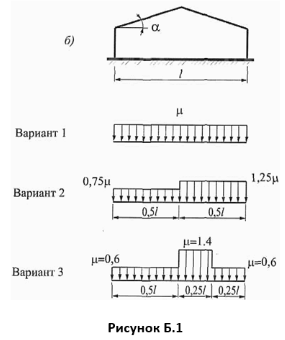

In [18]:
def mu_i(alpha):
    if alpha <= 30.0:
        mu = 1.0
    elif 30.0 < alpha < 60.0:
        mu = 1.0 - (alpha - 30.0) / 30.0
    else:
        mu = 0.0
    return mu

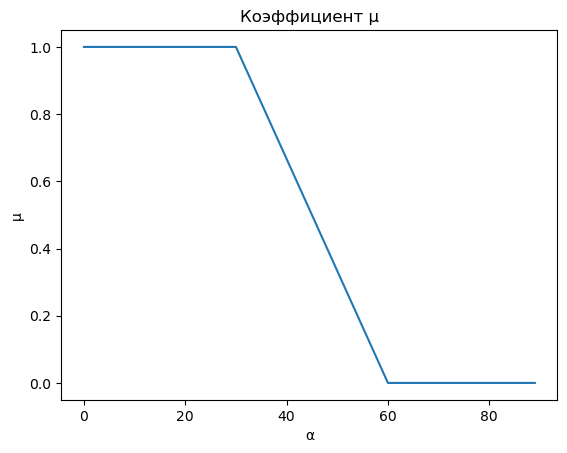

верхнее покрытие μ=1.000
нижнее покрытие μ=1.000


In [19]:
vmu_i = np.vectorize(mu_i)
ai = np.arange(0, 90)
mui = vmu_i(ai)
plt.plot(ai, mui)
plt.xlabel(ucd.lookup("GREEK SMALL LETTER ALPHA"))
plt.ylabel(ucd.lookup("GREEK SMALL LETTER MU"))
plt.title(r'Коэффициент '+ ucd.lookup("GREEK SMALL LETTER MU"))
plt.show()
mutop = mu_i(atop)
print("верхнее покрытие " + ucd.lookup("GREEK SMALL LETTER MU") + "={:.3f}".format(mutop))
mubot = mu_i(abot)
print("нижнее покрытие " + ucd.lookup("GREEK SMALL LETTER MU") + "={:.3f}".format(mubot))

Нормативное значение снеговой нагрузки на горизонтальную проекцию покрытия: $S_0(c_e,c_t,\mu) = c_e * c_t * \mu * S_g$ 

In [20]:
S0_top = cetop * ct * mutop * Sg
print("верхнее покрытие " + ucd.lookup("GREEK SMALL LETTER ALPHA") + "= {:.3f}\N{DEGREE SIGN} ---> S\u2080={:.3f} кПа".format(atop, S0_top))
S0_bot = cebot * ct * mubot * Sg
print("нижнее покрытие " + ucd.lookup("GREEK SMALL LETTER ALPHA") + "= {:.3f}\N{DEGREE SIGN} ---> S\u2080={:.3f} кПа".format(abot, S0_bot))

верхнее покрытие α= 0.000° ---> S₀=1.190 кПа
нижнее покрытие α= 0.000° ---> S₀=1.203 кПа


In [21]:
def sri(mu, S0):
    if tjan <= -5:
        s = 0.5 * mu * Sg
    else:
        s = S0
    return s

In [22]:
srtop = sri(mutop, S0_top)
srbot = sri(mubot, S0_bot)
print("Пониженное нормативное значение снеговой нагрузки: верхнее покрытие Sr= {0:.3f} кПа,  нижнее покрытие Sr= {1:.3f} кПа".format(srtop, srbot))

Пониженное нормативное значение снеговой нагрузки: верхнее покрытие Sr= 0.750 кПа,  нижнее покрытие Sr= 0.750 кПа


Расчетное значение нагрузки: $S(\gamma_f,S_0) = \gamma_f * S_0$

In [23]:
S_top1 = gf * S0_top
S_bot1 = gf * S0_bot
print("Расчетное значение нагрузки по 1-му предельному состоянию: верхнее покрытие S= {0:.3f} кПа, нижнее покрытие S= {1:.3f} кПа".format(S_top1, S_bot1))
S_top2 = S0_top
S_bot2 = S0_bot
print("Расчетное значение нагрузки по 2-му предельному состоянию: верхнее покрытие S= {0:.3f} кПа, нижнее покрытие S= {1:.3f} кПа".format(S_top2, S_bot2))

Расчетное значение нагрузки по 1-му предельному состоянию: верхнее покрытие S= 1.666 кПа, нижнее покрытие S= 1.684 кПа
Расчетное значение нагрузки по 2-му предельному состоянию: верхнее покрытие S= 1.190 кПа, нижнее покрытие S= 1.203 кПа


                                Б.8 Здания с перепадом высоты 
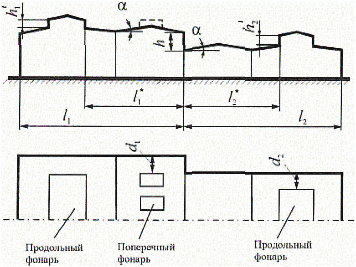
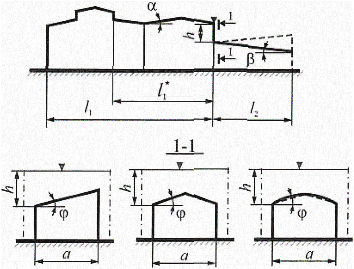

In [24]:
alpha1 = 0
alpha2 = 0
beta = 0
fi = 0
a = 18
S08 = Sg
h8 = 4.8
l1 = ltop
l1_=l1
l2 = lbot
if l2 > 3 * a:
    l2_ = 3 * a
else:
    l2_ = l2

In [25]:
def mi(alpha):
    if alpha <= 20:
        mu = 0.4
    else:
        mu = 0.3
    return mu

In [26]:
m1 = mi(alpha1)
k1 = math.sqrt(a / 21)
if beta >= 0:
    k2 = 1 - beta / 35
else:
    k2 = 1
k = 1 - beta / 30
if k < 0.3:
    k3 = 0.3
else:
    k3 = k
print("Коэффициенты: k1= {0:.3f}  k2= {1:.3f}, k3= {1:.3f}".format(k1, k2, k3))

Коэффициенты: k1= 0.926  k2= 1.000, k3= 1.000


In [27]:
if a < 21:
    m2 =0.5 * k1 * k2 * k3
elif m2 < 0.1:
    m2 = 0.1
else:
    m2 = mi(alpha2)
print("Коэффициенты: m1= {0:.3f}, m2= {1:.3f}".format(m1, m2))

Коэффициенты: m1= 0.400, m2= 0.463


In [28]:
mumax1 = 2* h8 / S08
if l1_ <= 48 and l2_ <= 48:
    mumax2 = 4
elif l1_ > 72:
    mumax2 = 6
elif l2_ > 72:
    mumax2 = 6
else:
    mumax2 = 4 + (2 * max(l1_, l2_) - 48) / 24
mumax = min(mumax1, mumax2)

Коэффициент $\mu: \mu(h_8) = 1 + 1 / h_8 * (m_1 * l_1' + m_2 * l_2')$ 

In [29]:
mu_8 =1 + 1 / h8 *(m1 * l1_ + m2 * l2_)
if mu_8 > mumax:
    mu8 = mumax
else:
   mu8 = mu_8
print(ucd.lookup("GREEK SMALL LETTER MU") + "= {0:.3f}".format(mu8))

μ= 4.000


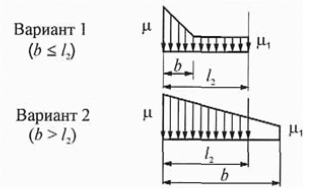

In [30]:
if mu_8 <= 2 * h8 / S08:
    b = 2 * h8
else:
    b = (mu_8 - 1 + 2 * m2) / (2 * h8 / S08 - 1 + 2 * m2) * 2 * h8
if b > 16:
    b8 = 16
elif b > 5 * h8:
    b8 = 5 * h8
else:
    b8 = b
print("Длина зоны повышенных снегоотложений b= {0:.3f} м".format(b8))

Длина зоны повышенных снегоотложений b= 9.600 м


In [31]:
if b8 >= l2_:
    mu1 = 1 - 2 * m2
elif mu_8 <= 2 * h8 / S08 and hpbot == 0:
    mu1 = 1 - 2 * m2
elif l2_ > b8 and mu_8 <= 2 * h8 / S08 and hpbot > 0:
    mu1 = 1 - m2 * l2_ / (l2_ - h8)
else:
    mu1 = (l2_ - 0.5 * mu8 * b8) / (l2_ - 0.5 * b8)
if mu1 < 0.2:
    mu1 = 0.2
print(ucd.lookup("GREEK SMALL LETTER MU") + "\u2081= {0:.3f}".format(mu1))

μ₁= 0.405


                Б.13 Покрытие с парапетами
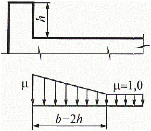

In [32]:
S0p = Sg

In [33]:
def mup_i(hp):
    if hp > S0p / 2:
        mup = 2 * hp /S0p
    else:
        mup = 1
    if mup > 3:
        mu = 3
    else:
        mu = mup
    return mu

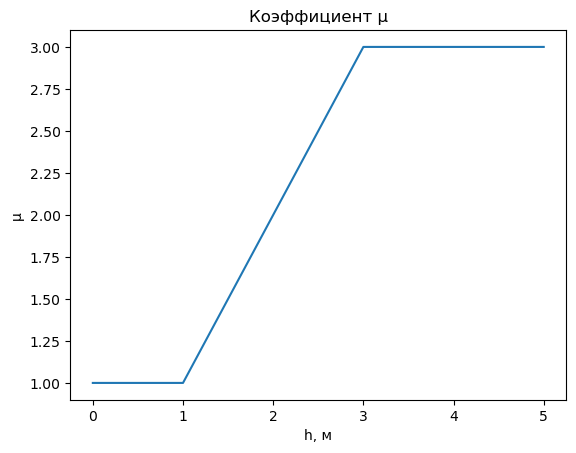

верхнее покрытие μ= 1.000
нижнее покрытие μ= 1.200
верхнее покрытие b= 0.800
нижнее покрытие b= 1.800


In [34]:
vmup_i = np.vectorize(mup_i)
hpi = np.arange(0, 6)
mupi = vmup_i(hpi)
plt.plot(hpi, mupi)
plt.xlabel("h, м")
plt.ylabel(ucd.lookup("GREEK SMALL LETTER MU"))
plt.title(r'Коэффициент '+ ucd.lookup("GREEK SMALL LETTER MU"))
plt.show()
mup_top = mup_i(hptop)
mup_bot = mup_i(hpbot)
bp_top = 2 * hptop
bp_bot = 2 * hpbot
print("верхнее покрытие " + ucd.lookup("GREEK SMALL LETTER MU") + "= {0:.3f}".format(mup_top))
print("нижнее покрытие " + ucd.lookup("GREEK SMALL LETTER MU") + "= {0:.3f}".format(mup_bot))
print("верхнее покрытие b= {0:.3f}".format(bp_top))
print("нижнее покрытие b= {0:.3f}".format(bp_bot))